<a href="https://colab.research.google.com/github/LynnDN/Web_Scraping/blob/main/Feature_based_Approach_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature-Based Approach Using Large Language Models 

In this approach, we use a copus amount of tect as input to the Transformer to get output embeddings. The output is then used as input for classification models.


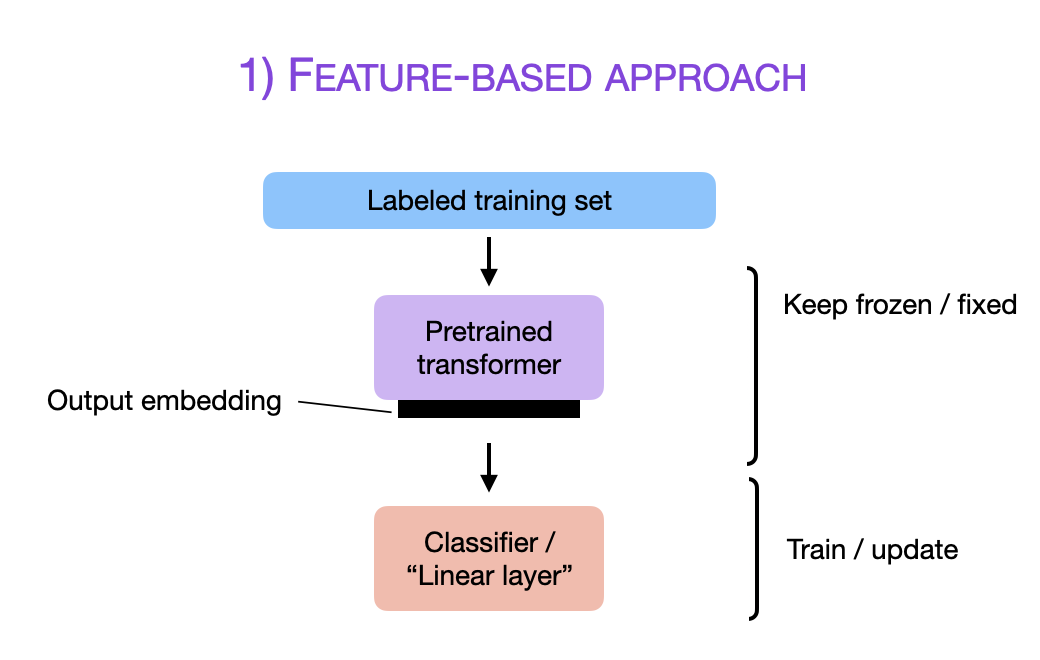

In [1]:
!pip install transformer datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [14]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.9 MB/s eta 0:00:00


## Check if i have gpu on machone to use.

In [2]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# 1. Loading the dataset 

## 1.1 Loading the Depandancies

* These are all the libraries and modules we will use for the program

In [28]:
import pandas as pd
import numpy as np


In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-25 12:37:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-25 12:37:44 (96.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
#here we will be coding a feature based , or working on the feature based model and understanding its accuracy with respect to our dataset
from helper_functions import unzip_data, calculate_results
unzip_data('/content/train_test.zip')

In [9]:
#Importing the datasets
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [11]:
print('Train: ',df_train.shape)
print('Test: ', df_test.shape)

Train:  (814, 6)
Test:  (204, 6)


## 1.2 Inspecting the data

### 1.2.1 The train data 

In [29]:
df_train.head(5)

,Unnamed: 0,sentences,Subject,Object,relations,relations_id
0,0,“Brands that optimized their eGift and gift ca...,Theresa McEndree,Blackhawk Network,managerOf,0
1,1,"This is a huge win for retailers, as gift car...","Theresa McEndree,",Blackhawk Network,managerOf,0
2,4,"This is a huge win for retailers, as gift car...",Theresa McEndree,Blackhawk Network,employedBy,2
3,5,by[E1] Esther Shein[/E1] in [E2]CXO[/E2],Esther Shein,CXO,employedBy,2
4,6,COVID-19 has forced many organizations to rein...,Claudia Crummenerl,Capgemini Invent,managerOf,0


In [8]:
df_train['sentences'][0]

'“Brands that optimized their eGift and gift card eCommerce experience won this holiday season. As consumer behavior continued the rapid, digital migration, gift card programs are no exception. This is a huge win for retailers, as gift card recipients show up ready and excited to use them,” said [E1]Theresa McEndree[/E1], global head of marketing and corporate brand, [E2]Blackhawk Network[/E2]. “Digital adoption will continue and is here to stay. This stream of digital shoppers will benefit retail sales in the first quarter of the year. Nearly half of consumers surveyed expect to spend at least $25 more than the value of their gift cards—and many plan to spend them within the first few months following the holiday season.”'

### 1.2.2 The test data 

In [31]:
df_test.head(5)

,Unnamed: 0,sentences,Subject,Object,relations,relations_id
0,336,SurveyMonkey is used to collect critical data ...,SurveyMonkey,Lurie,noRelation,3
1,163,[E1]Paul Burrin[/E1] is VP Product at [E2]Sage...,Paul Burrin,Sage People,managerOf,0
2,551,[E1]DeepL[/E1] is based in [E2]Germany[/E2] an...,DeepL,Germany,locatedAt,1
3,379,“We have dozens of languages to support but Lu...,SurveyMonkey,Lurie,noRelation,3
4,339,[E1]SurveyMonkey[/E1] thinks it will benefit c...,SurveyMonkey,Lurie,noRelation,3


In [12]:
df_test['sentences'][0]

'SurveyMonkey is used to collect critical data and [E1]SurveyMonkey[/E1] has evolved so that SurveyMonkey can help them analyse and do something with it in different ways,[E2]Lurie[/E2] adds.'

# 2. Visualization

# 3. Tokenization

* This is the process of taking the input and breaking it down to token to extract patterns. (puts the words into number the model can understand)

Steps:~

* To achieve this we will first take our input and convert it to a list. Given the tokenizer a list of inputs.

In [32]:
train_sentence = df_train['sentences']
train_sentence = list(train_sentence)

In [35]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model=AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)



* Gettting the data to tokenize from the train data.

In [18]:
train_sentence = df_train['sentences']
train_sentence = list(train_sentence)

In [23]:
train_sentence[0]

'“Brands that optimized their eGift and gift card eCommerce experience won this holiday season. As consumer behavior continued the rapid, digital migration, gift card programs are no exception. This is a huge win for retailers, as gift card recipients show up ready and excited to use them,” said [E1]Theresa McEndree[/E1], global head of marketing and corporate brand, [E2]Blackhawk Network[/E2]. “Digital adoption will continue and is here to stay. This stream of digital shoppers will benefit retail sales in the first quarter of the year. Nearly half of consumers surveyed expect to spend at least $25 more than the value of their gift cards—and many plan to spend them within the first few months following the holiday season.”'

In [38]:
batch = tokenizer(train_sentence, padding=True, truncation=True, max_length=512, return_tensors="pt")


print(batch)

{'input_ids': tensor([[ 101, 1523, 9639,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        ...,
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2023,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [41]:
batch['input_ids'].shape

torch.Size([814, 215])

In [39]:
import torch
import torch.nn.functional as F

In [43]:
with torch.no_grad():
  outputs = model(**batch)
  print(outputs)
  predictions = F.softmax(outputs.logits, dim=1)
  print(predictions)
  labels=torch.argmax(predictions, dim=1)
  print(labels)

SequenceClassifierOutput(loss=None, logits=tensor([[-3.5882,  3.7910],
        [-3.5935,  3.7964],
        [-3.6111,  3.8182],
        ...,
        [-3.6877,  3.9010],
        [-3.6776,  3.8581],
        [-3.1804,  3.3304]]), hidden_states=None, attentions=None)
tensor([[6.2373e-04, 9.9938e-01],
        [6.1712e-04, 9.9938e-01],
        [5.9324e-04, 9.9941e-01],
        ...,
        [5.0590e-04, 9.9949e-01],
        [5.3335e-04, 9.9947e-01],
        [1.4851e-03, 9.9851e-01]])
tensor([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0

In [51]:
input_ids = batch['input_ids']
attention_mask =  batch['attention_mask']


# Print the token IDs and attention mask
print("Token IDs:", input_ids)
print("Attention Mask:", attention_mask)

Token IDs: tensor([[ 101, 1523, 9639,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        ...,
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2023,  ...,    0,    0,    0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [48]:
# Print the token IDs and attention mask
print("Token IDs:", input_ids)

Token IDs: tensor([[ 101, 1523, 9639,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        ...,
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2023,  ...,    0,    0,    0]])


In [49]:
print("Attention Mask:", attention_mask)

Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [54]:
with torch.no_grad():
  outputs = model(**batch)
  logits = outputs.logits

In [64]:
logits[0].shape

torch.Size([2])

In [65]:
logits.shape

torch.Size([814, 2])

In [70]:
X= np.array(logits)

In [71]:
X.shape

(814, 2)

In [68]:
X_train = logits.numpy()

In [69]:
X_train.shape

(814, 2)

In [72]:
y_train = df_train['relations_id']

In [73]:
y_train.shape

(814,)

# 4. Train Linear Model using the Embeddings from transformer


In [74]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 

In [75]:
logreg.fit(X_train, y_train) 

LogisticRegression()

In [76]:
# Calculate accuracy on the training set

print("Training accuracy", logreg.score(X_train, y_train))

Training accuracy 0.43366093366093367
